<a href="https://colab.research.google.com/github/sunitadhotre/Artificial-Intelligence/blob/main/Day5_Assignment_SSD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import roc_auc_score as auc
from sklearn.metrics import confusion_matrix as cm
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import log_loss
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [6]:
hr = pd.read_csv("/content/HR_comma_sep.csv")
dum_hr = pd.get_dummies(hr, drop_first=True)
dum_hr.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.10,0.77,6,247,4,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [7]:
X = dum_hr.drop('left', axis=1)
y = dum_hr['left']

In [8]:
params = {'max_depth':[2,3,4,5,6,None],
         'min_samples_split':[2, 5, 10, 30],
         'min_samples_leaf': [1, 10, 50]}
dtc = DecisionTreeClassifier(random_state=23)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=23)
gcv = GridSearchCV(dtc, param_grid=params, cv=kfold, scoring='neg_log_loss')
gcv.fit(X, y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=23, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=23),
             param_grid={'max_depth': [2, 3, 4, 5, 6, None],
                         'min_samples_leaf': [1, 10, 50],
                         'min_samples_split': [2, 5, 10, 30]},
             scoring='neg_log_loss')

In [9]:
print(gcv.best_params_)
print(gcv.best_score_)

{'max_depth': 6, 'min_samples_leaf': 10, 'min_samples_split': 30}
-0.10831472973424117


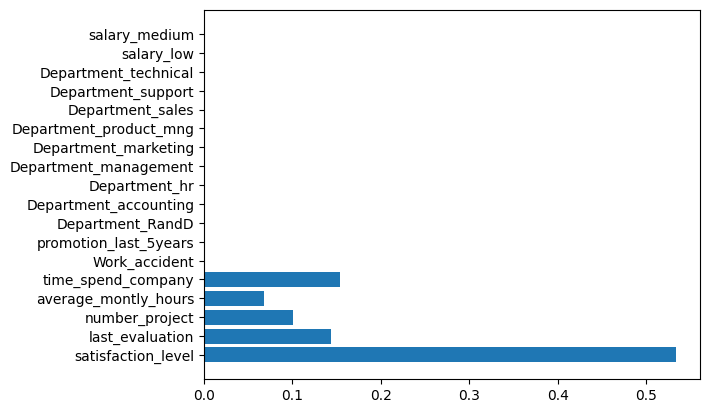

In [10]:
best_model = gcv.best_estimator_
df_imp = pd.DataFrame({'Feature':best_model.feature_names_in_,
                      'Importance':best_model.feature_importances_})
plt.barh(df_imp['Feature'], df_imp['Importance'])
plt.show()

Grid Search for Random Forest

In [11]:
params = {'max_depth':[2,3,4,5,6,None],
         'min_samples_split':[2, 5, 10, 30],
         'min_samples_leaf': [1, 10, 50],
         'max_features': [2,3,4]}
rf = RandomForestClassifier(random_state=23, n_estimators=25)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=23)
gcv = GridSearchCV(rf, param_grid=params, cv=kfold, scoring='neg_log_loss')
gcv.fit(X, y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=23, shuffle=True),
             estimator=RandomForestClassifier(n_estimators=25, random_state=23),
             param_grid={'max_depth': [2, 3, 4, 5, 6, None],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [1, 10, 50],
                         'min_samples_split': [2, 5, 10, 30]},
             scoring='neg_log_loss')

In [12]:
print(gcv.best_params_)
print(gcv.best_score_)

{'max_depth': None, 'max_features': 4, 'min_samples_leaf': 1, 'min_samples_split': 30}
-0.08408792926625785


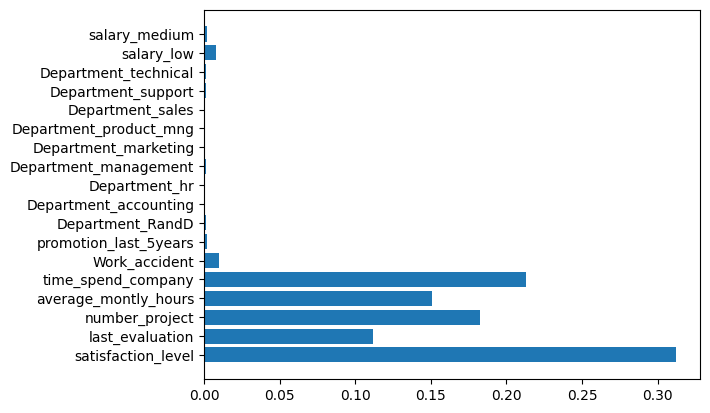

In [13]:
best_model = gcv.best_estimator_
df_imp = pd.DataFrame({'Feature':best_model.feature_names_in_,
                      'Importance':best_model.feature_importances_})
plt.barh(df_imp['Feature'], df_imp['Importance'])
plt.show()

,NO,D,YR,R1,R2,R3,R4,R5,R6,R7,...,R15,R16,R17,R18,R19,R20,R21,R22,R23,R24
0,1,0,78,0.23,0.08,0.02,0.03,0.46,0.12,0.19,...,0.05,0.57,0.15,0.23,3.56,0.26,1.55,0.43,0.11,0.17
1,2,0,77,0.19,0.07,0.09,0.12,0.02,0.02,0.03,...,0.09,0.12,0.16,0.22,3.78,1.29,1.40,0.06,0.07,0.10
2,3,0,72,0.07,0.02,0.03,0.05,0.06,0.10,0.14,...,-0.03,0.02,0.02,0.04,13.29,1.61,1.43,0.03,0.05,0.07


Unlabelled Data

In [25]:
tst_brupt = pd.read_csv("/testBankruptcy.csv")
tst_brupt.head(3)

,NO,R1,R2,R3,R4,R5,R6,R7,R8,R9,...,R15,R16,R17,R18,R19,R20,R21,R22,R23,R24
0,133,0.16,0.08,0.06,0.08,0.03,0.02,0.03,1.46,2.74,...,0.01,0.08,0.06,0.08,4.39,0.74,1.35,0.09,0.06,-0.09
1,134,0.10,0.04,0.07,0.07,0.02,0.04,0.04,5.88,1.54,...,-0.08,-0.04,-0.07,-0.07,7.75,1.81,1.05,-0.03,-0.05,-0.06
2,135,0.06,0.04,0.30,0.05,-0.11,-0.08,-0.13,0.84,0.50,...,0.11,0.24,0.19,0.29,2.85,0.88,1.53,0.11,0.09,-0.04


In [26]:
tst_brupt = tst_brupt.drop('NO', axis=1)
tst_brupt

,R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,...,R15,R16,R17,R18,R19,R20,R21,R22,R23,R24
0,0.16,0.08,0.06,0.08,0.03,0.02,0.03,1.46,2.74,0.75,...,0.01,0.08,0.06,0.08,4.39,0.740,1.35,0.09,0.06,-0.09
1,0.10,0.04,0.07,0.07,0.02,0.04,0.04,5.88,1.54,0.32,...,-0.08,-0.04,-0.07,-0.07,7.75,1.810,1.05,-0.03,-0.05,-0.06
2,0.06,0.04,0.30,0.05,-0.11,-0.08,-0.13,0.84,0.50,1.53,...,0.11,0.24,0.19,0.29,2.85,0.880,1.53,0.11,0.09,-0.04
3,0.26,0.03,0.07,0.20,0.07,-0.20,0.40,3.27,1.65,0.52,...,0.38,0.08,0.17,0.49,9.54,3.114,2.89,0.08,0.17,0.08
4,0.26,0.02,0.90,-0.14,0.07,-0.60,0.35,42.56,1.58,0.40,...,0.14,0.07,0.16,0.33,51.15,2.540,2.03,0.07,0.17,0.33
5,0.22,0.02,0.04,0.09,0.11,0.17,0.40,2.22,3.11,0.21,...,0.25,0.10,0.16,0.37,8.00,1.570,2.36,0.10,0.16,0.50


In [27]:
X.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Department_RandD', 'Department_accounting',
       'Department_hr', 'Department_management', 'Department_marketing',
       'Department_product_mng', 'Department_sales', 'Department_support',
       'Department_technical', 'salary_low', 'salary_medium'],
      dtype='object')

In [28]:
tst_brupt.columns

Index(['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11',
       'R12', 'R13', 'R14', 'R15', 'R16', 'R17', 'R18', 'R19', 'R20', 'R21',
       'R22', 'R23', 'R24'],
      dtype='object')